In [50]:
from pandas import DataFrame
from pandas import Series
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress specific warnings if necessary
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

# Set pandas option
pd.options.mode.copy_on_write = True

# Define file paths
meat_pop_path = "New Files/meat_totals.csv"
us_temps_path = "New Files/global_temps_country.csv"
global_temps_path = "New Files/global_temps.csv"

# Read data
meat_pop_df = pd.read_csv(meat_pop_path)
us_temps_df = pd.read_csv(us_temps_path)
global_temps_df = pd.read_csv(global_temps_path)

# Additional dataframes
filtered_global_temp_df = pd.read_csv("New Files\global_temps_country_filtered.csv")
crop_production_df = pd.read_csv("New Files\crop_production.csv")
pork_prices_df = pd.read_csv("New Files\pork_prices.csv")
beef_prices_df = pd.read_csv("New Files/beef_prices.csv")
methane_levels_df = pd.read_csv("New Files\methane_levels_annual.csv")
climdiv_state_year_df =  pd.read_csv("New Files\climdiv_state_year.csv")


In [51]:
# Look at Data types and modify if necessary
meat_pop_df.dtypes

Month                      int64
Day                        int64
Year                       int64
beef_commercial          float64
veal_commercial          float64
pork_commercial          float64
lamb_commercial          float64
total_red_commercial     float64
beef_federal             float64
veal_federal             float64
pork_federal             float64
lamb_federal             float64
total_red_federal        float64
broilers_federal         float64
chicken_federal          float64
turkey_federal           float64
total_poultry_federal    float64
total_meat_federal       float64
dtype: object

In [52]:
#Find total red meat overall and make new column
meat_pop_df["total_red_meat"] = meat_pop_df["total_red_commercial"]+meat_pop_df["total_red_federal"]

meat_pop_df.head()

Month  Day  Year  beef_commercial  veal_commercial  pork_commercial  \
0      2    1  2024           2168.5              3.6           2371.2   
1      1    1  2024           2280.8              3.9           2472.7   
2     12    1  2023           2189.9              3.9           2342.0   
3     11    1  2023           2280.9              4.3           2388.2   
4     10    1  2023           2340.9              4.2           2418.5   

   lamb_commercial  total_red_commercial  beef_federal  veal_federal  \
0             10.9                4554.2        2135.0           3.4   
1             10.6                4768.0        2246.1           3.8   
2             10.7                4546.4        2159.0           3.7   
3             11.2                4684.5        2247.3           4.1   
4             11.3                4774.8        2300.8           4.0   

   pork_federal  lamb_federal  total_red_federal  broilers_federal  \
0        2361.4           9.8             4509.6            3734.3   
1        2462.4           9.6             4721.9            4051.4   
2        2332.4           9.5             4504.7            3616.2   
3        2377.4          10.1             4638.9            3817.3   
4        2406.2           9.8             4720.8            4177.3   

   chicken_federal  turkey_federal  total_poultry_federal  total_meat_federal  \
0             44.4           423.9                 4213.3              8722.9   
1             47.4           435.2                 4547.6              9269.5   
2             41.5           393.0                 4063.1              8567.8   
3             44.5           449.2                 4324.0              8962.9   
4             51.0           500.5                 4742.1              9462.9   

   total_red_meat  
0          9063.8  
1          9489.9  
2          9051.1  
3          9323.4  
4          9495.6

In [53]:
#Look for only 1977 and after because null values before that
meat_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed
meat_pop_1977_df = meat_pop_1977_df[["Month", "Year", "total_red_commercial", "total_red_federal", "total_red_meat"]]

#Drop Null Values

meat_pop_1977_df = meat_pop_1977_df.dropna()

meat_pop_1977_df.head()

Month  Year  total_red_commercial  total_red_federal  total_red_meat
0      2  2024                4554.2             4509.6          9063.8
1      1  2024                4768.0             4721.9          9489.9
2     12  2023                4546.4             4504.7          9051.1
3     11  2023                4684.5             4638.9          9323.4
4     10  2023                4774.8             4720.8          9495.6

In [54]:
#Drop Null Values to convert Dtypes
us_temps_df = us_temps_df.dropna()
#Change Data Types
us_temps_df["month"] = us_temps_df["month"].astype("int64")
us_temps_df.dtypes

month                              int64
day                                int64
year                               int64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [55]:
#Rename to match meat data frame
us_temps_df = us_temps_df.rename(columns={"year":"Year", "month":"Month"})

us_temps_df.dtypes
# #Filter to 1977
us_temps_1977_df = us_temps_df.loc[us_temps_df["Year"]>=1977]


#reduce
us_temps_1977_df = us_temps_1977_df[["Year", "Month", "AverageTemperature"]]
us_temps_1977_df.head()

Year  Month  AverageTemperature
893  1977      1              -5.601
894  1977      2               0.271
895  1977      3               2.918
896  1977      4               9.153
897  1977      5              14.556

In [56]:
#Merge!

us_temps_meat_df = pd.merge(meat_pop_1977_df, us_temps_1977_df, left_on = ["Year", "Month"], right_on = ["Year", "Month"], how = "inner")

us_temps_meat_df.head()

Month  Year  total_red_commercial  total_red_federal  total_red_meat  \
0      9  2013                3937.0             3896.4          7833.4   
1      8  2013                4202.4             4161.3          8363.7   
2      7  2013                4158.2             4117.8          8276.0   
3      6  2013                3854.5             3817.5          7672.0   
4      5  2013                4150.0             4111.6          8261.6   

   AverageTemperature  
0              18.273  
1              21.168  
2              22.074  
3              20.198  
4              14.073

In [57]:
outliers_df = us_temps_meat_df.loc[us_temps_meat_df["total_red_meat"]>10000]

filtered_df = us_temps_meat_df[us_temps_meat_df["total_red_meat"]<=10000]

filtered_df.head()

Month  Year  total_red_commercial  total_red_federal  total_red_meat  \
0      9  2013                3937.0             3896.4          7833.4   
1      8  2013                4202.4             4161.3          8363.7   
2      7  2013                4158.2             4117.8          8276.0   
3      6  2013                3854.5             3817.5          7672.0   
4      5  2013                4150.0             4111.6          8261.6   

   AverageTemperature  
0              18.273  
1              21.168  
2              22.074  
3              20.198  
4              14.073

In [58]:
#Find Averages of total_red_meat
average_df = filtered_df.groupby("Year")["total_red_meat"].mean()

average_df = pd.DataFrame(average_df)

average_df.head()

total_red_meat
Year                
1977     6329.408333
1978     6180.683333
1979     6044.975000
1980     6266.800000
1981     6289.391667

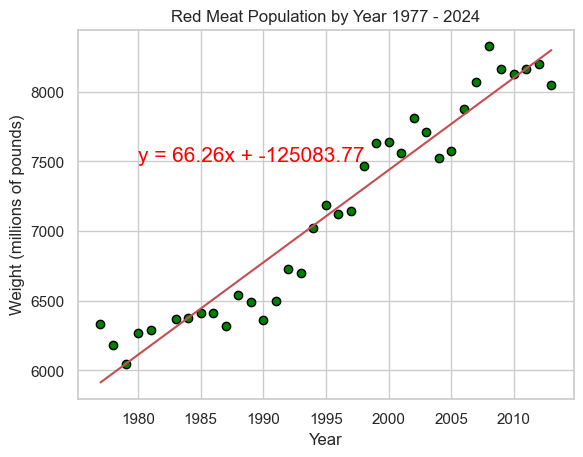

In [59]:
# production of red meat

#Scatter plot
x = average_df.index
y = average_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Red Meat Population by Year 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

# Save the plot
# plt.savefig("red_meat_population_scatter_regression.png")

plt.show()

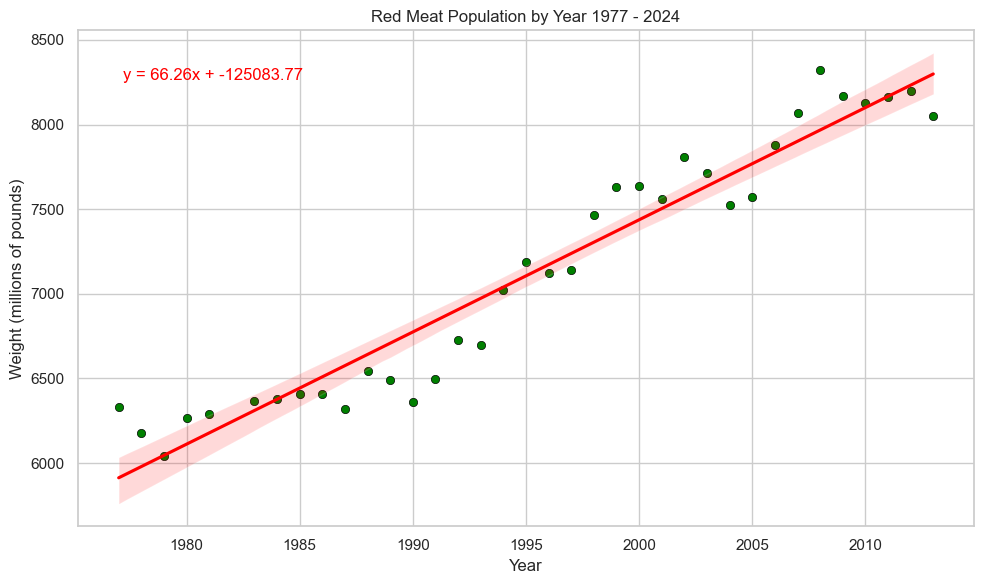

In [60]:
# production of red meat using seaborn

# Scatter plot with regression line 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=average_df, x=average_df.index, y="total_red_meat", color="green", edgecolor="black")
sns.regplot(data=average_df, x=average_df.index, y="total_red_meat", scatter=False, color="red")

# Adding regression equation
x = average_df.index
y = average_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Red Meat Population by Year 1977 - 2024")

# Save the plot
# plt.savefig("red_meat_population_regression.png")

plt.tight_layout()
plt.show()

In [61]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(average_df, x=average_df.index, y="total_red_meat", trendline="ols", 
                 trendline_color_override="red", labels={"index": "Year", "total_red_meat": "Weight (millions of pounds)"},
                 title="Red Meat Population by Year 1977 - 2024")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

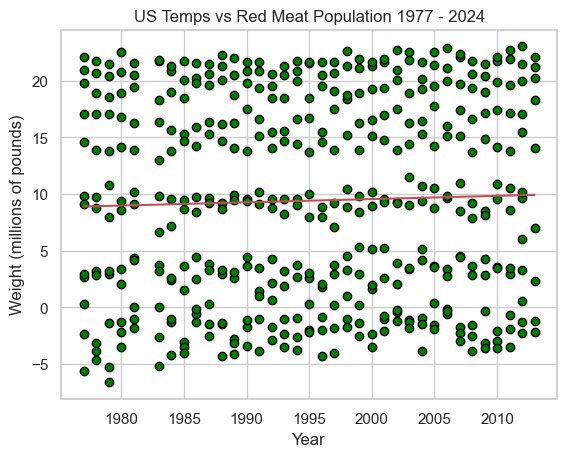

In [62]:
# Calculating US Avg temp Vs Red Meat population by Decade using seaborn
#Scatter plot
x = filtered_df["Year"]
y = filtered_df["AverageTemperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("US Temps vs Red Meat Population 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (1977, 55), fontsize=15, color="red")

# Save the plot
# plt.savefig("us_temps_vs_red_meat_population.png")

plt.show()

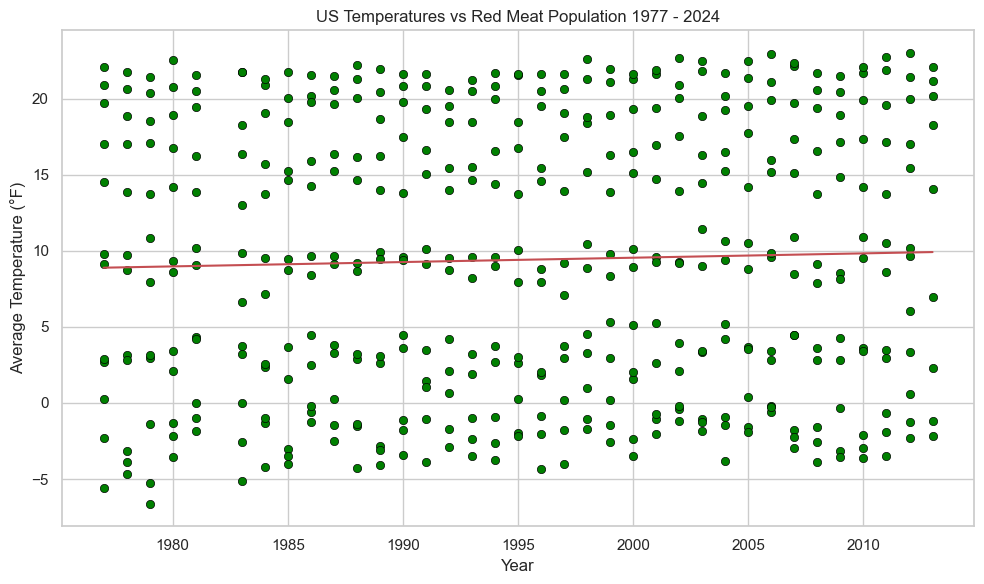

In [63]:
# Calculating US Avg temp Vs Red Meat population by Decade using seaborn

# Scatter plot with regression line using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x="Year", y="AverageTemperature", color="green", edgecolor="black")

# Calculate regression line
x = filtered_df["Year"]
y = filtered_df["AverageTemperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Plot regression line
plt.plot(x, regress_values, "r-")

# Adding regression equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, xy=(1977, 55), fontsize=12, color='red')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.title("US Temperatures vs Red Meat Population 1977 - 2024")

plt.tight_layout()

# Save the plot
# plt.savefig("us_temps_vs_red_meat_population.png")

plt.show()

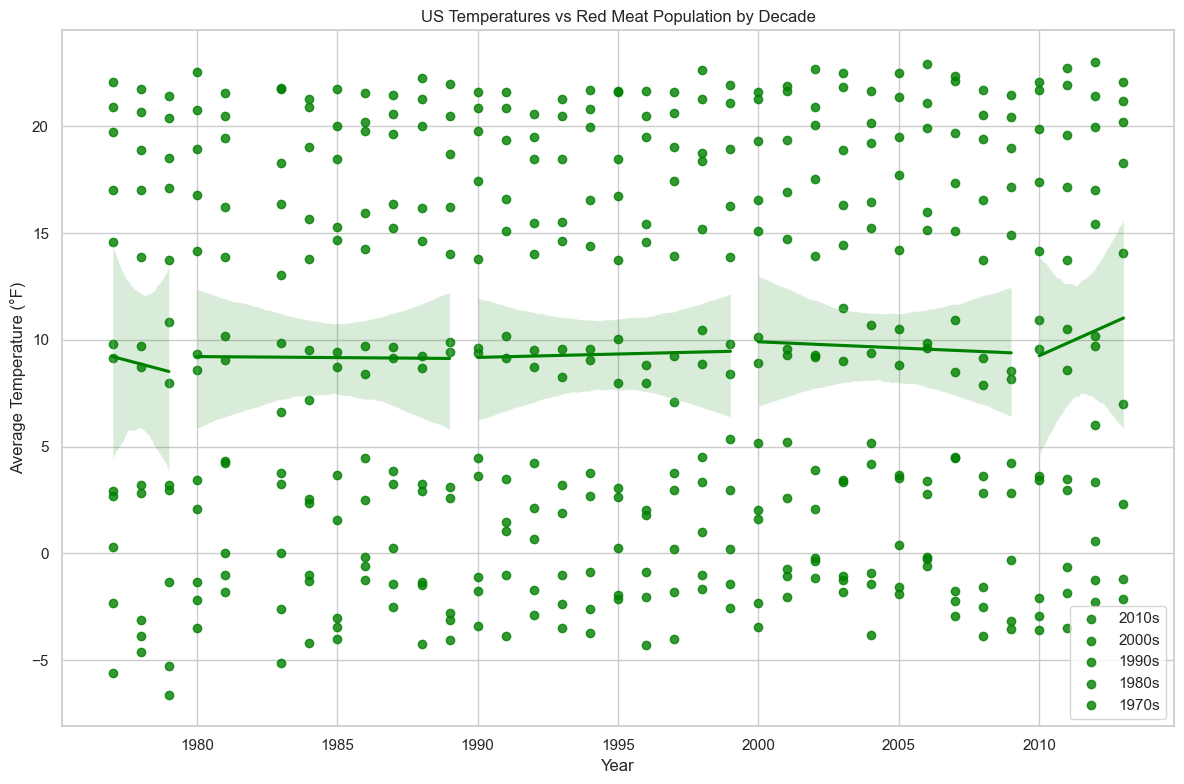

In [15]:
# Calculating the Average temp Vs Red Meat population by Decade using seaborn

# Calculate the decade for each year
filtered_df["Decade"] = (filtered_df["Year"] // 10) * 10

# Set the style
sns.set(style="whitegrid")

# Create a scatter plot with regression line for each decade
plt.figure(figsize=(12, 8))
for decade in filtered_df["Decade"].unique():
    decade_data = filtered_df[filtered_df["Decade"] == decade]
    sns.regplot(data=decade_data, x="Year", y="AverageTemperature", scatter=True, color="green", label=f"{decade}s")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.title("US Temperatures vs Red Meat Population by Decade")

# Add legend
plt.legend()

# Save the plot
# plt.savefig("average_temperature_regression_per_decade.png")

plt.tight_layout()
plt.show()

In [16]:
# Calculating the Average temp Vs Red Meat population by Decade using plotly

# Calculate the decade for each year
filtered_df["Decade"] = (filtered_df["Year"] // 10) * 10

# Set the style
sns.set(style="whitegrid")

# Create a scatter plot with regression line for each decade
fig = px.scatter(filtered_df, x="Year", y="AverageTemperature", color="Decade", trendline="ols", 
                 labels={"Year": "Year", "AverageTemperature": "Average Temperature (°F)", "Decade": "Decade"},
                 title="US Temperatures vs Red Meat Population by Decade")
fig.update_traces(marker=dict(size=8))
fig.update_traces(line=dict(color='green', width=2))

# Update layout
fig.update_layout(
    legend_title_text="Decade",
    xaxis_title="Year",
    yaxis_title="Average Temperature (°F)",
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("average_temperature_regression_per_decade_plotly.png")

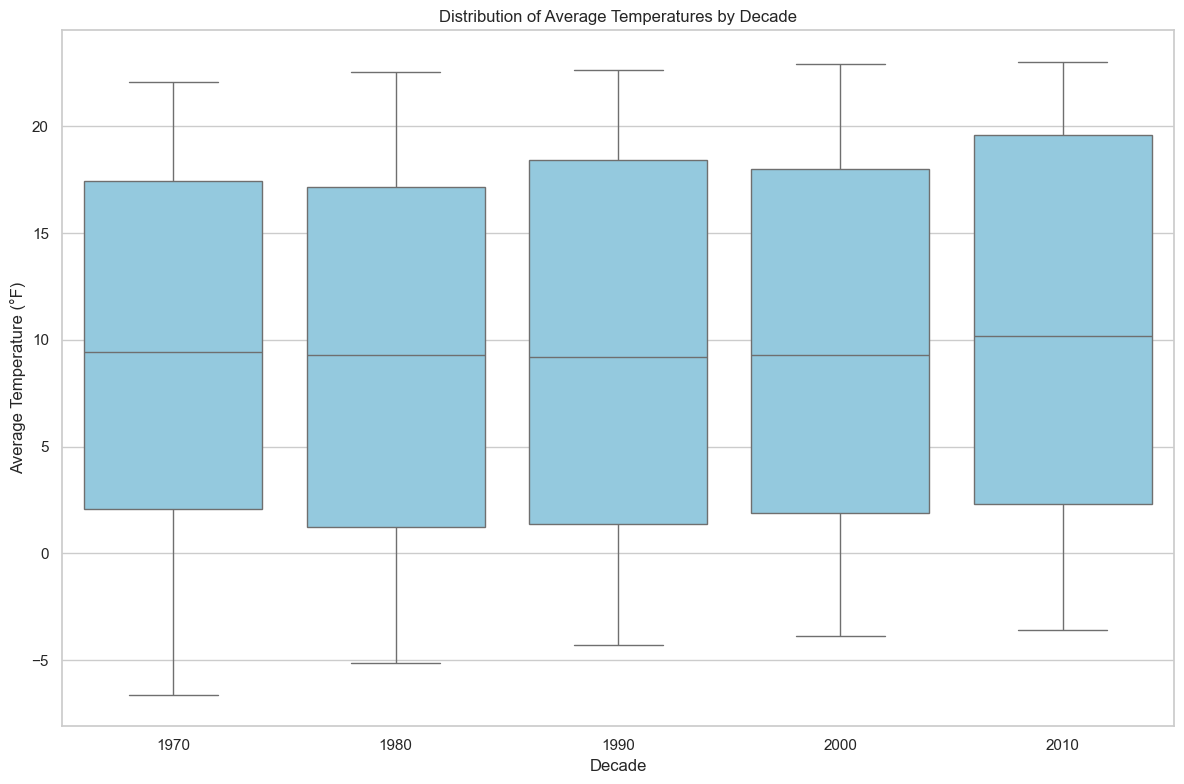

In [17]:
# Calculating avergae temp per decade using seaborn boxplot

# Calculate the decade for each year
filtered_df["Decade"] = (filtered_df["Year"] // 10) * 10

# Set the style
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x="Decade", y="AverageTemperature", color="skyblue")

# Adding labels and title
plt.xlabel("Decade")
plt.ylabel("Average Temperature (°F)")
plt.title("Distribution of Average Temperatures by Decade")

# Save the plot
# plt.savefig("average_temperature_boxplot_per_decade.png")

plt.tight_layout()
plt.show()

In [18]:
# Calculate the decade for each year
filtered_df["Decade"] = (filtered_df["Year"] // 10) * 10

# Create the box plot using Plotly Express
fig = px.box(filtered_df, x="Decade", y="AverageTemperature", color="Decade",
             labels={"Decade": "Decade", "AverageTemperature": "Average Temperature (°F)"},
             title="Distribution of Average Temperatures by Decade")

# Update layout
fig.update_layout(
    xaxis_title="Decade",
    yaxis_title="Average Temperature (°F)",
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("average_temperature_boxplot_per_decade_plotly.png")


In [19]:
#Clean Global Temps
#Drop Null
global_temps_df = global_temps_df.dropna()

global_temps_df.head()

Month  Day  Year  LandAverageTemperature  \
0      1    1  1930                   2.401   
1      2    1  1930                   3.152   
2      3    1  1930                   5.483   
3      4    1  1930                   8.182   
4      5    1  1930                  11.105   

   LandAverageTemperatureUncertainty  LandMaxTemperature  \
0                              0.226               7.670   
1                              0.236               8.900   
2                              0.191              11.539   
3                              0.242              14.017   
4                              0.292              16.870   

   LandMaxTemperatureUncertainty  LandMinTemperature  \
0                          0.216              -3.169   
1                          0.252              -2.852   
2                          0.273              -0.571   
3                          0.254               2.072   
4                          0.272               5.016   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                          0.343                          13.260   
1                          0.252                          13.540   
2                          0.209                          14.326   
3                          0.271                          15.081   
4                          0.314                          15.911   

   LandAndOceanAverageTemperatureUncertainty  
0                                      0.130  
1                                      0.126  
2                                      0.127  
3                                      0.124  
4                                      0.131

In [20]:
july_df = global_temps_df.loc[global_temps_df["Month"]==7]
#july_df = july_df.sort_values(by="Year")

august_df = global_temps_df.loc[global_temps_df["Month"]==8]

june_df = global_temps_df.loc[global_temps_df["Month"]==6]

july_df.head()

Month  Day  Year  LandAverageTemperature  \
6       7    1  1930                  14.465   
18      7    1  1931                  14.576   
30      7    1  1932                  14.372   
42      7    1  1933                  14.236   
54      7    1  1934                  14.343   

    LandAverageTemperatureUncertainty  LandMaxTemperature  \
6                               0.301              20.252   
18                              0.302              20.399   
30                              0.306              20.093   
42                              0.300              20.037   
54                              0.296              20.140   

    LandMaxTemperatureUncertainty  LandMinTemperature  \
6                           0.267               8.415   
18                          0.275               8.665   
30                          0.286               8.416   
42                          0.282               8.295   
54                          0.288               8.472   

    LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
6                           0.287                          16.854   
18                          0.328                          16.967   
30                          0.339                          16.846   
42                          0.291                          16.704   
54                          0.317                          16.851   

    LandAndOceanAverageTemperatureUncertainty  
6                                       0.137  
18                                      0.138  
30                                      0.138  
42                                      0.136  
54                                      0.134

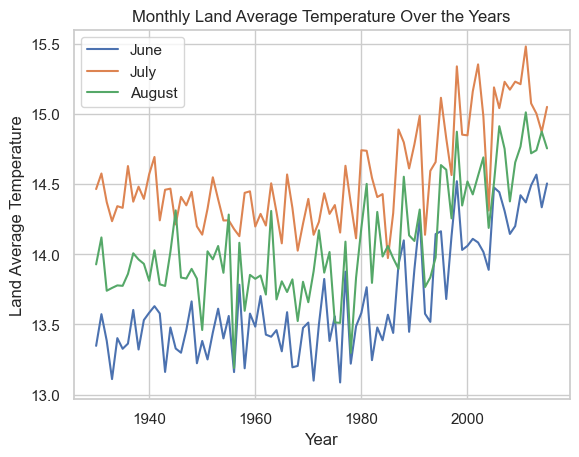

In [21]:
# Land average temp for June, july August 
fig = plt.figure()

for frame in [june_df, july_df, august_df]:
    plt.plot(frame["Year"], frame["LandAverageTemperature"])

plt.xlabel("Year")
plt.ylabel("Land Average Temperature")
plt.title("Monthly Land Average Temperature Over the Years")
plt.legend(["June", "July", "August"])

# Save the plot
# plt.savefig("monthly_land_average_temperature.png")

plt.show()

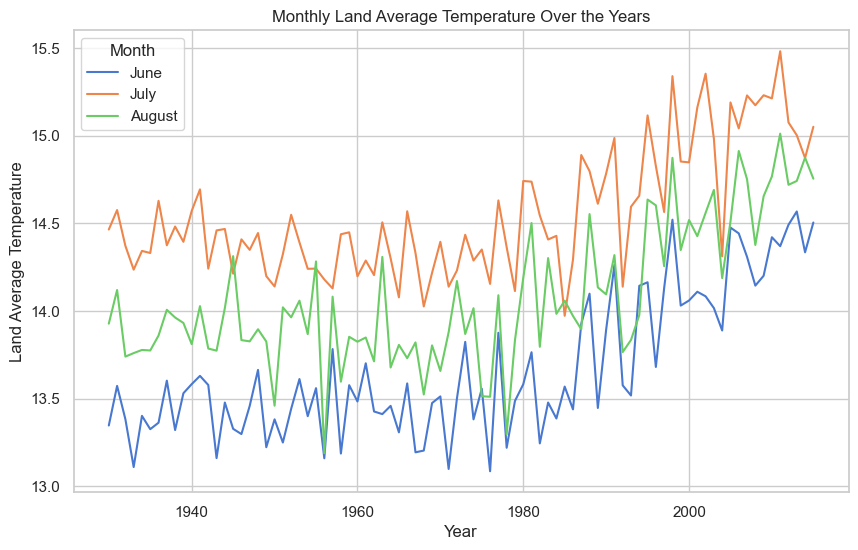

In [22]:
# Land average temp for June, july August using Seaborn
# Concatenate the data frames and add a "Month" column to use seaborn 
june_df["Month"] = "June"
july_df["Month"] = "July"
august_df["Month"] = "August"
concatenated_df = pd.concat([june_df, july_df, august_df], ignore_index=True)

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=concatenated_df, x="Year", y="LandAverageTemperature", hue="Month", palette="muted")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Land Average Temperature")
plt.title("Monthly Land Average Temperature Over the Years")

# Save the plot
# plt.savefig("monthly_land_average_temperature_seaborn.png")

plt.show()

In [23]:
# Land average temp for June, july August using plotly 

# Concatenate the data frames and add a "Month" column
june_df["Month"] = "June"
july_df["Month"] = "July"
august_df["Month"] = "August"
concatenated_df = pd.concat([june_df, july_df, august_df], ignore_index=True)

# Create the interactive plot using Plotly
fig = px.line(concatenated_df, x="Year", y="LandAverageTemperature", color="Month",
              title="Monthly Land Average Temperature Over the Years")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Land Average Temperature")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

In [24]:
# Average temps accross the globe 
# Define the mapping for renaming the columns filtered_global_temp_df

new_column_names = {
    'dt': 'Date',
    'AverageTemperature': 'Avg_Temperature',
    'AverageTemperatureUncertainty' : 'Avg_temp_uncertainty',
    'Country': 'Country'
}

# Rename the columns
filtered_global_temp_df.rename(columns=new_column_names, inplace=True)


# Convert the 'Date' column to datetime format
filtered_global_temp_df['Date'] = pd.to_datetime(filtered_global_temp_df['Date'])

# Extract year and month from the 'Date' column
filtered_global_temp_df['Year'] = filtered_global_temp_df['Date'].dt.year
filtered_global_temp_df['Month'] = filtered_global_temp_df['Date'].dt.month

filtered_global_temp_df.head()

Date  Avg_Temperature  Avg_temp_uncertainty    Country  Year  Month
0 1970-01-01           20.963                 0.203  Argentina  1970      1
1 1970-02-01           21.538                 0.230  Argentina  1970      2
2 1970-03-01           18.698                 0.225  Argentina  1970      3
3 1970-04-01           16.784                 0.252  Argentina  1970      4
4 1970-05-01           11.408                 0.192  Argentina  1970      5

In [25]:
# Create the interactive plot using Plotly to compare countires temp by year grouped by decade 
fig = px.line(filtered_global_temp_df, x='Year', y='Avg_Temperature', color='Country', title='Average Temperature by Year and Country')
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Average Temperature')

# Save the plot as an image file
# fig.write_image("average_temperature_by_year_and_country_plotly.png")

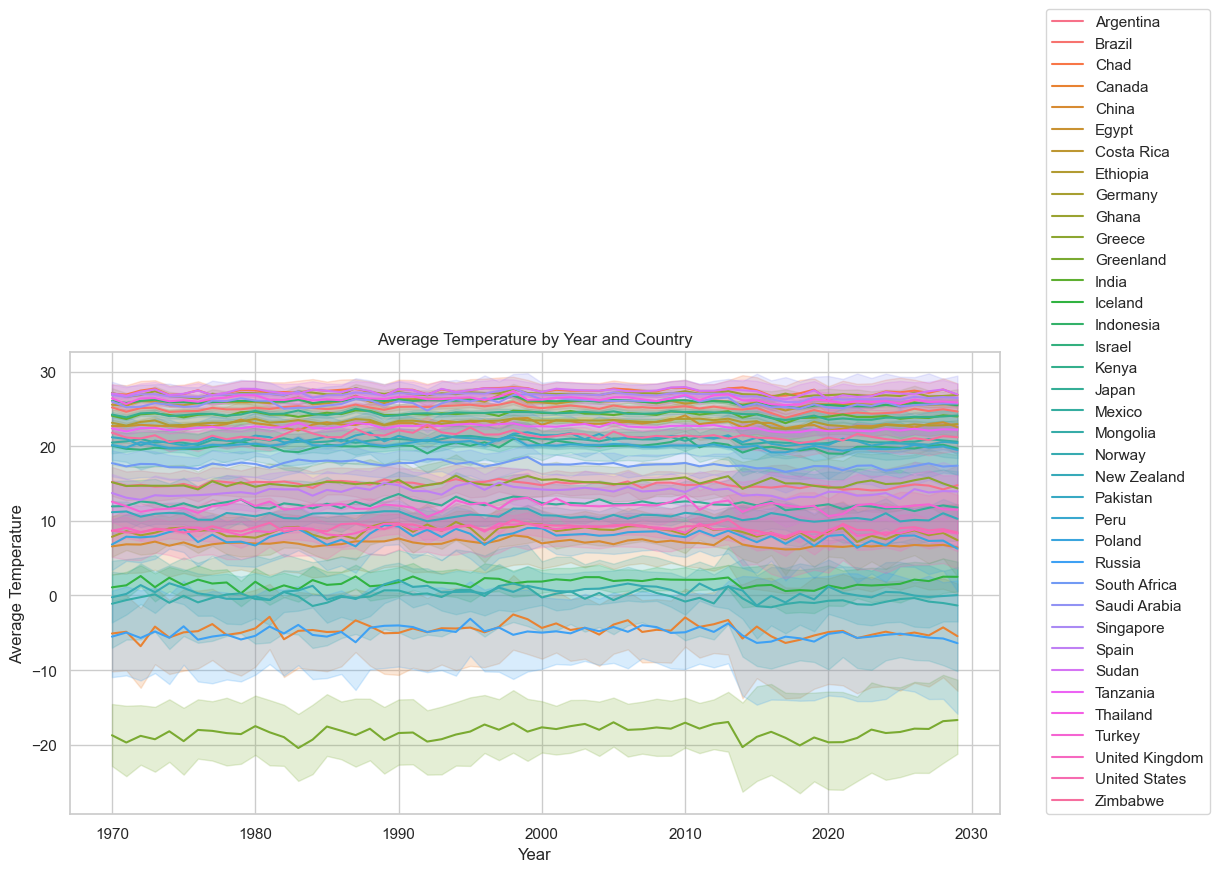

In [26]:
# Create a plot using Seaborn to compare countires temp by year grouped by decade 

# Set the style
sns.set(style="whitegrid")

# Create the line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_global_temp_df, x='Year', y='Avg_Temperature', hue='Country')

# Move the legend to the bottom
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Year and Country')

# Save the plot as an image file
# plt.savefig("average_temperature_by_year_and_country_seaborn.png")

# Show the plot
plt.show()

In [27]:
# Define the mapping for renaming the columns  for crop_production_df.head()
new_column_names = {
    'index': 'Index',
    'LOCATION': 'Location',
    'INDICATOR': 'Indicator',
    'SUBJECT': 'Subject',
    'MEASURE': 'Measure',
    'FREQUENCY': 'Frequency',
    'TIME': 'Year',
    'VALUE': 'Value'
}

# Rename the columns
crop_production_df.rename(columns=new_column_names, inplace=True)

# Drop rows with NaN values
crop_production_df.dropna(inplace=True)

crop_production_df.head()


Index Location  Indicator Subject   Measure Frequency  Year     Value
0      0      AUS  CROPYIELD    RICE  TONNE_HA         A  1990  8.314607
1      1      AUS  CROPYIELD    RICE  TONNE_HA         A  1991  8.394737
2      2      AUS  CROPYIELD    RICE  TONNE_HA         A  1992  8.094340
3      3      AUS  CROPYIELD    RICE  TONNE_HA         A  1993  8.336000
4      4      AUS  CROPYIELD    RICE  TONNE_HA         A  1994  8.537815

In [28]:
unique_location = crop_production_df['Location'].unique()
print(unique_location)

['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'IND' 'IDN' 'IRN' 'KAZ' 'MYS' 'MOZ'
 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA' 'THA' 'UKR'
 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'NOR' 'CHE' 'EU28' 'ISR'
 'HTI']


In [29]:
unique_subject = crop_production_df['Subject'].unique()
print(unique_subject)

['RICE' 'WHEAT' 'MAIZE' 'SOYBEAN']


In [30]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(data, threshold=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Apply the function to remove outliers from the 'Value' column
crop_production_df['Value'] = remove_outliers_iqr(crop_production_df['Value'])

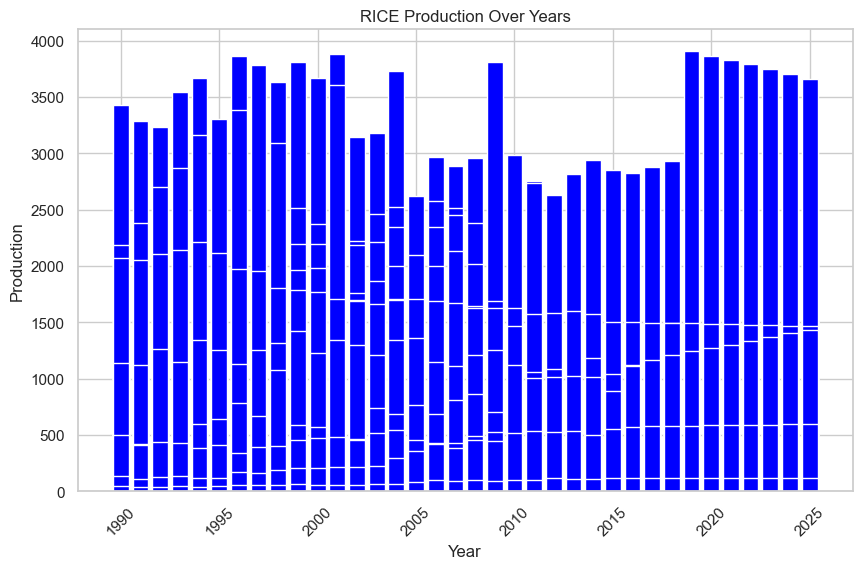

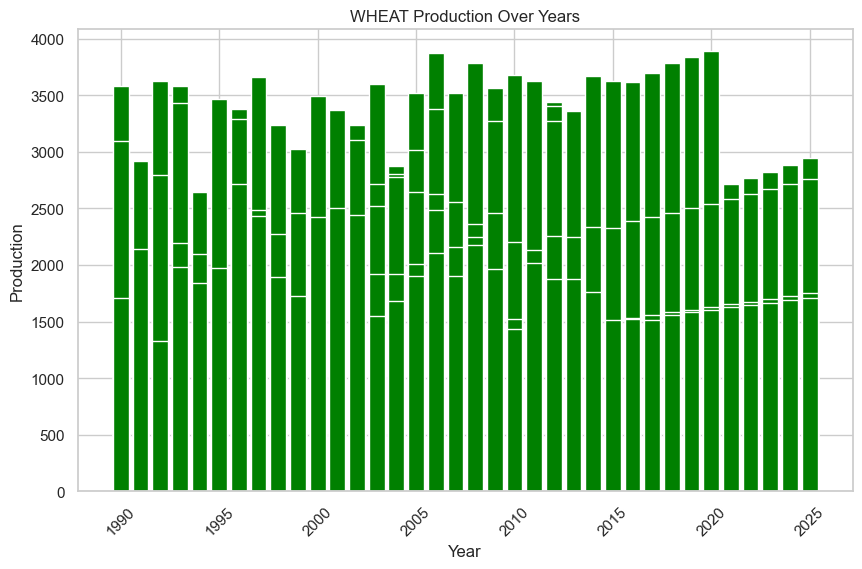

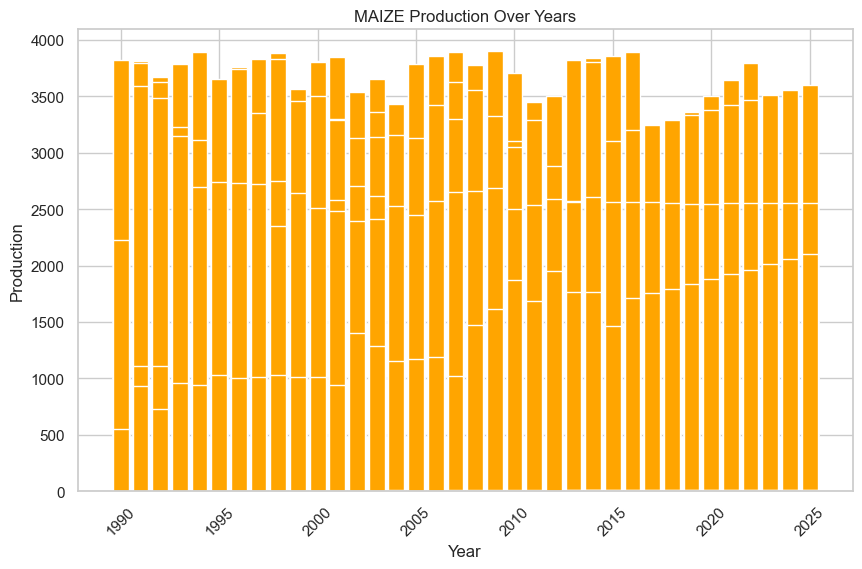

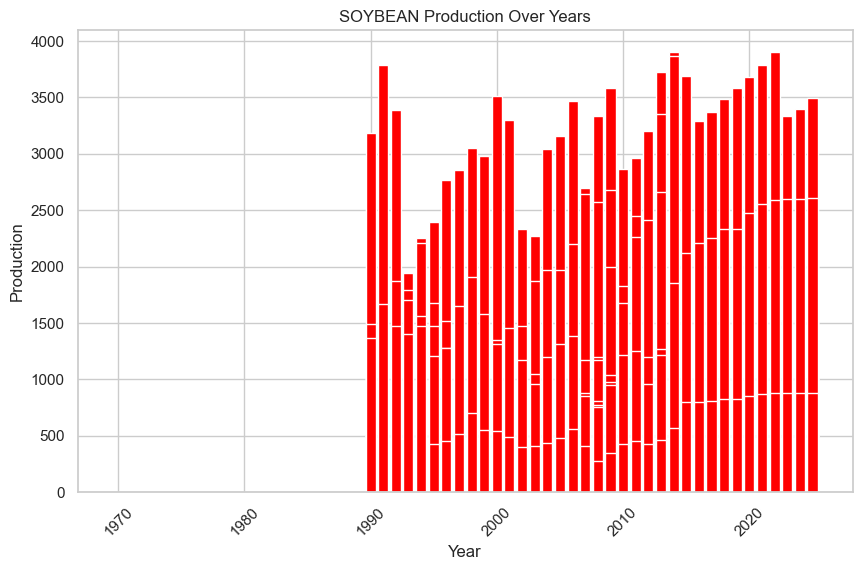

In [31]:

# Define a color palette for each subject
color_palette = {'RICE': 'blue', 'WHEAT': 'green', 'MAIZE': 'orange', 'SOYBEAN': 'red'}

# Filter data for each subject and create individual bar graphs
for subject in ['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN']:
    subject_data = crop_production_df[crop_production_df['Subject'] == subject]
    
    # Create a bar graph for the current subject
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(subject_data['Year'], subject_data['Value'], color=color_palette[subject])
    
    # Add labels and title
    plt.title(f"{subject} Production Over Years")
    plt.xlabel('Year')
    plt.ylabel('Production')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
    # Show or save the plot
    plt.show()  
    
    # Save the plot as an image file
    # plt.savefig(f"{subject}_production_bar.png")  

In [32]:
# Production of each crop over the years using Plotly
    
# Define a color palette for each subject
color_palette = {'RICE': 'blue', 'WHEAT': 'green', 'MAIZE': 'orange', 'SOYBEAN': 'red'}

# Filter data for each subject and create individual bar charts
fig = go.Figure()

for subject in ['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN']:
    subject_data = crop_production_df[(crop_production_df['Subject'] == subject) & (crop_production_df['Year'] >= 1990)]
    
    # Add a trace for the current subject
    fig.add_trace(go.Bar(x=subject_data['Year'], y=subject_data['Value'],
                         name=subject,
                         marker_color=color_palette[subject]))

# Update layout
fig.update_layout(title='Crop Production Over Years (Starting from 1990)',
                  xaxis_title='Year',
                  yaxis_title='Production',
                  barmode='group')  # To group bars for each year

# Show the plot
fig.show()

# Save the plot as an image file
# fig.write_image("crop_production_over_years_starting_from_1990_bar_plotly.png")


In [33]:
# using ploty to compare crop production by decade

# Define a color palette for each subject
color_palette = {'RICE': 'blue', 'WHEAT': 'green', 'MAIZE': 'orange', 'SOYBEAN': 'red'}

# Define a function to get decade from year
def get_decade(year):
    return str(year // 10 * 10) + "s"

# Apply the function to create a new column 'Decade'
crop_production_df['Decade'] = crop_production_df['Year'].apply(get_decade)

# Filter data for each subject and create individual bar graphs
for subject in ['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN']:
    subject_data = crop_production_df[crop_production_df['Subject'] == subject]
    
    # Create a bar graph for the current subject using Plotly
    fig = px.bar(subject_data, x='Decade', y='Value', color='Decade', color_discrete_map=color_palette,
                 title=f"{subject} Production Over Decades", labels={'Decade': 'Decade', 'Value': 'Production'})
    
    # Show the plot
    fig.show()
    
    # Save the plot as an image file
    # fig.write_image(f"{subject}_production_bar_plotly.png")


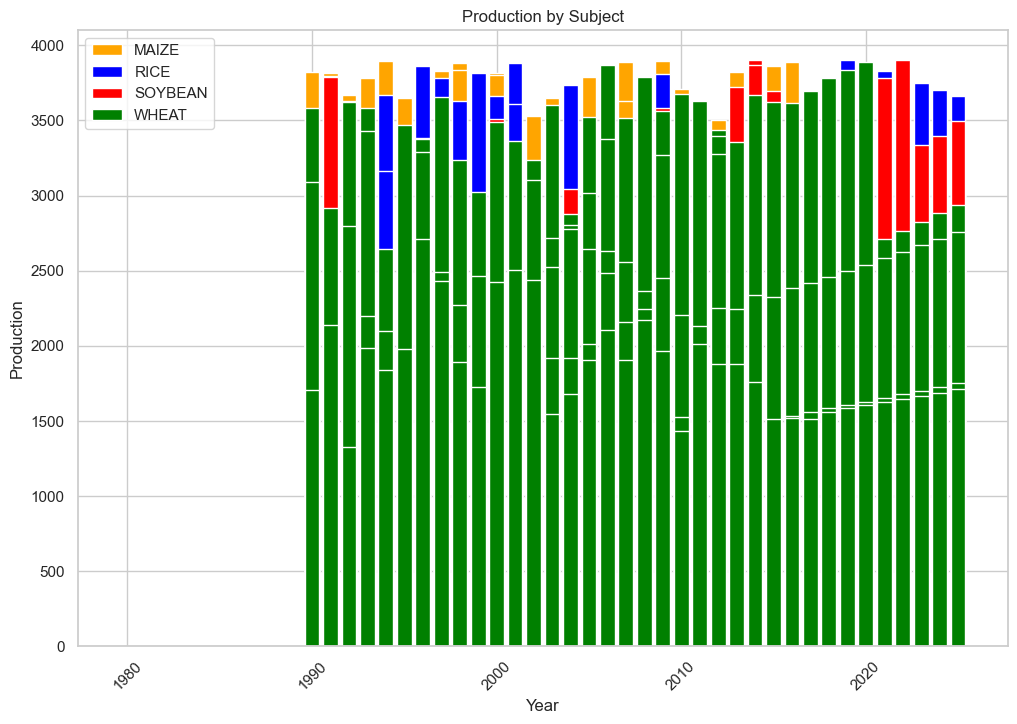

In [34]:
# crop production after 1980..

# Define a color palette for each subject
color_palette = {'RICE': 'blue', 'WHEAT': 'green', 'MAIZE': 'orange', 'SOYBEAN': 'red'}

# Filter the data to include only years after 1980
crop_production_df_filtered = crop_production_df[crop_production_df['Year'] >= 1980]

# Create a single plot for all subjects
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Group the filtered data by subject
grouped_data = crop_production_df_filtered.groupby('Subject')

# Iterate through each subject
for subject, group_data in grouped_data:
    # Plot the data for the current subject
    plt.bar(group_data['Year'], group_data['Value'], color=color_palette[subject], label=subject)

# Add labels and title
plt.title('Production by Subject')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show or save the plot
plt.show()  

# Save the combined plot as an image
# plt.savefig("combined_production_bar.png")

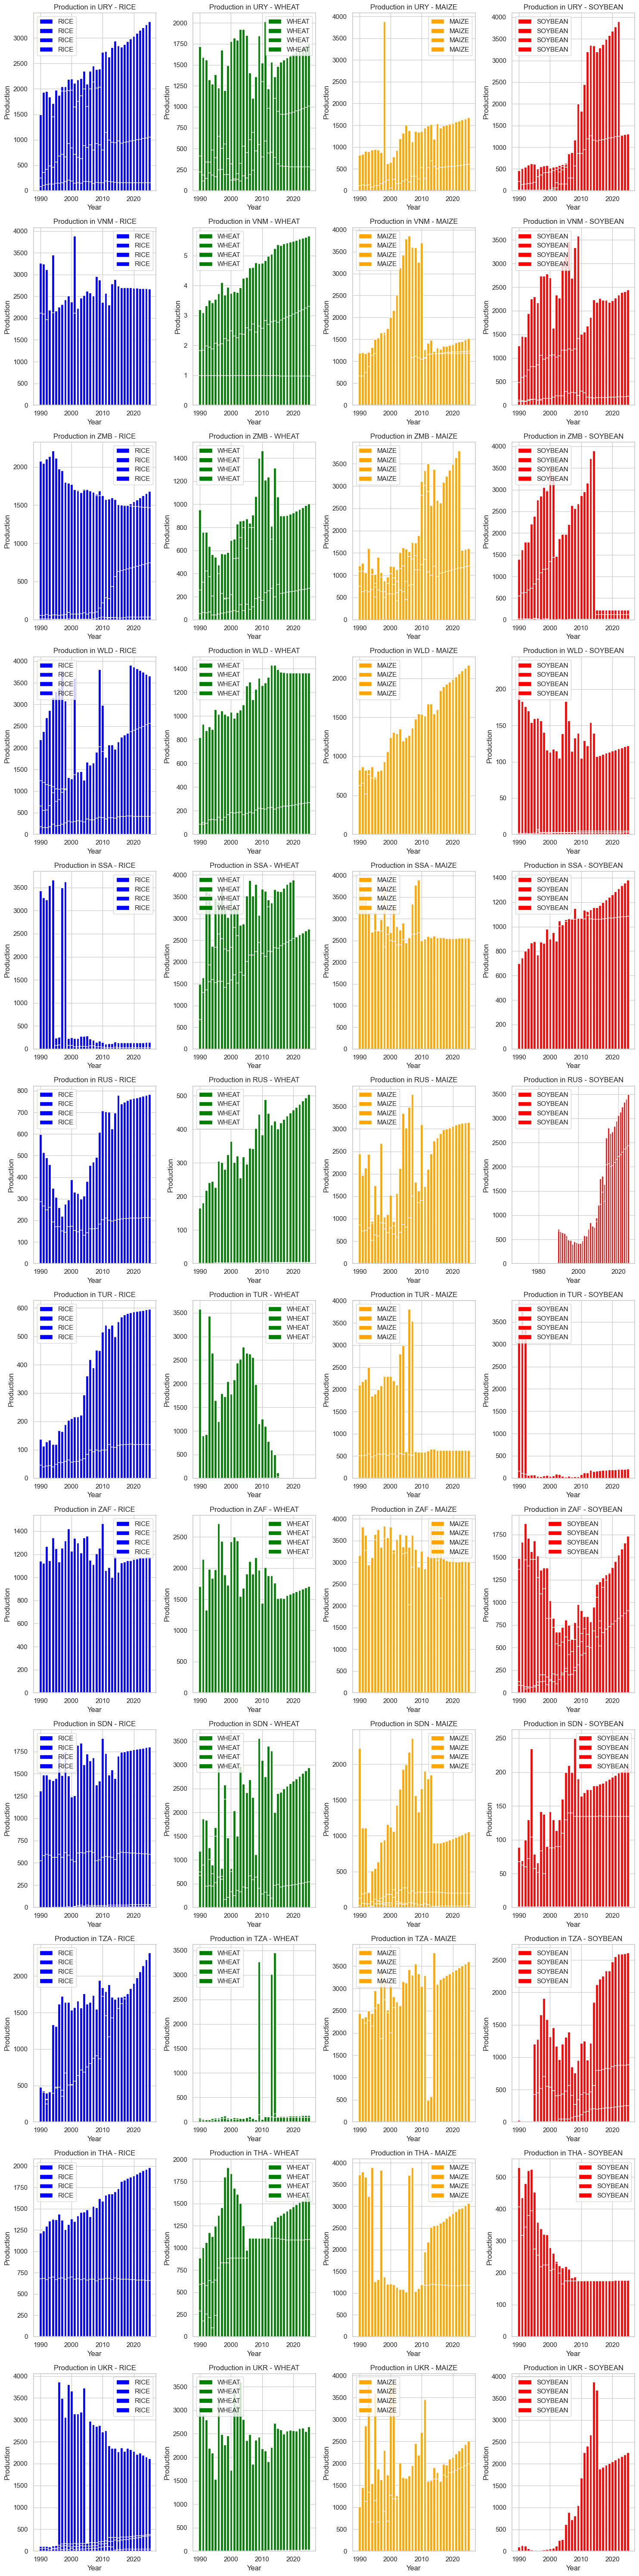

In [35]:
# Crop production by location and subject using 
# Define a color palette for each subject
color_palette = {'RICE': 'blue', 'WHEAT': 'green', 'MAIZE': 'orange', 'SOYBEAN': 'red'}

# Group the data by unique location and subject
grouped_data = crop_production_df.groupby(['Location', 'Subject'])

# Calculate the number of rows and columns for subplots
num_locations = len(crop_production_df['Location'].unique())
num_subjects = len(crop_production_df['Subject'].unique())
num_cols = min(num_subjects, 4)  
num_rows = - (- num_locations // num_cols)  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes if there's only one row
if num_rows == 1:
    axes = axes[np.newaxis, :]

# Iterate through each group
for (location, subject), group_data in grouped_data:
    # Determine the subplot indices
    location_index = np.where(crop_production_df['Location'].unique() == location)[0][0]
    subject_index = np.where(crop_production_df['Subject'].unique() == subject)[0][0]
    
    # Plot the data for the current combination of location and subject
    ax = axes[location_index % num_rows, subject_index % num_cols]
    for label, df in group_data.groupby('Subject'):
        ax.bar(df['Year'], df['Value'], color=color_palette[label], label=label)
    
    # Add labels and title
    ax.set_title(f"Production in {location} - {subject}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Production')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show or save the plot
plt.show()  

# Save the plot as an image file 
# plt.savefig("combined_production_bar.png")


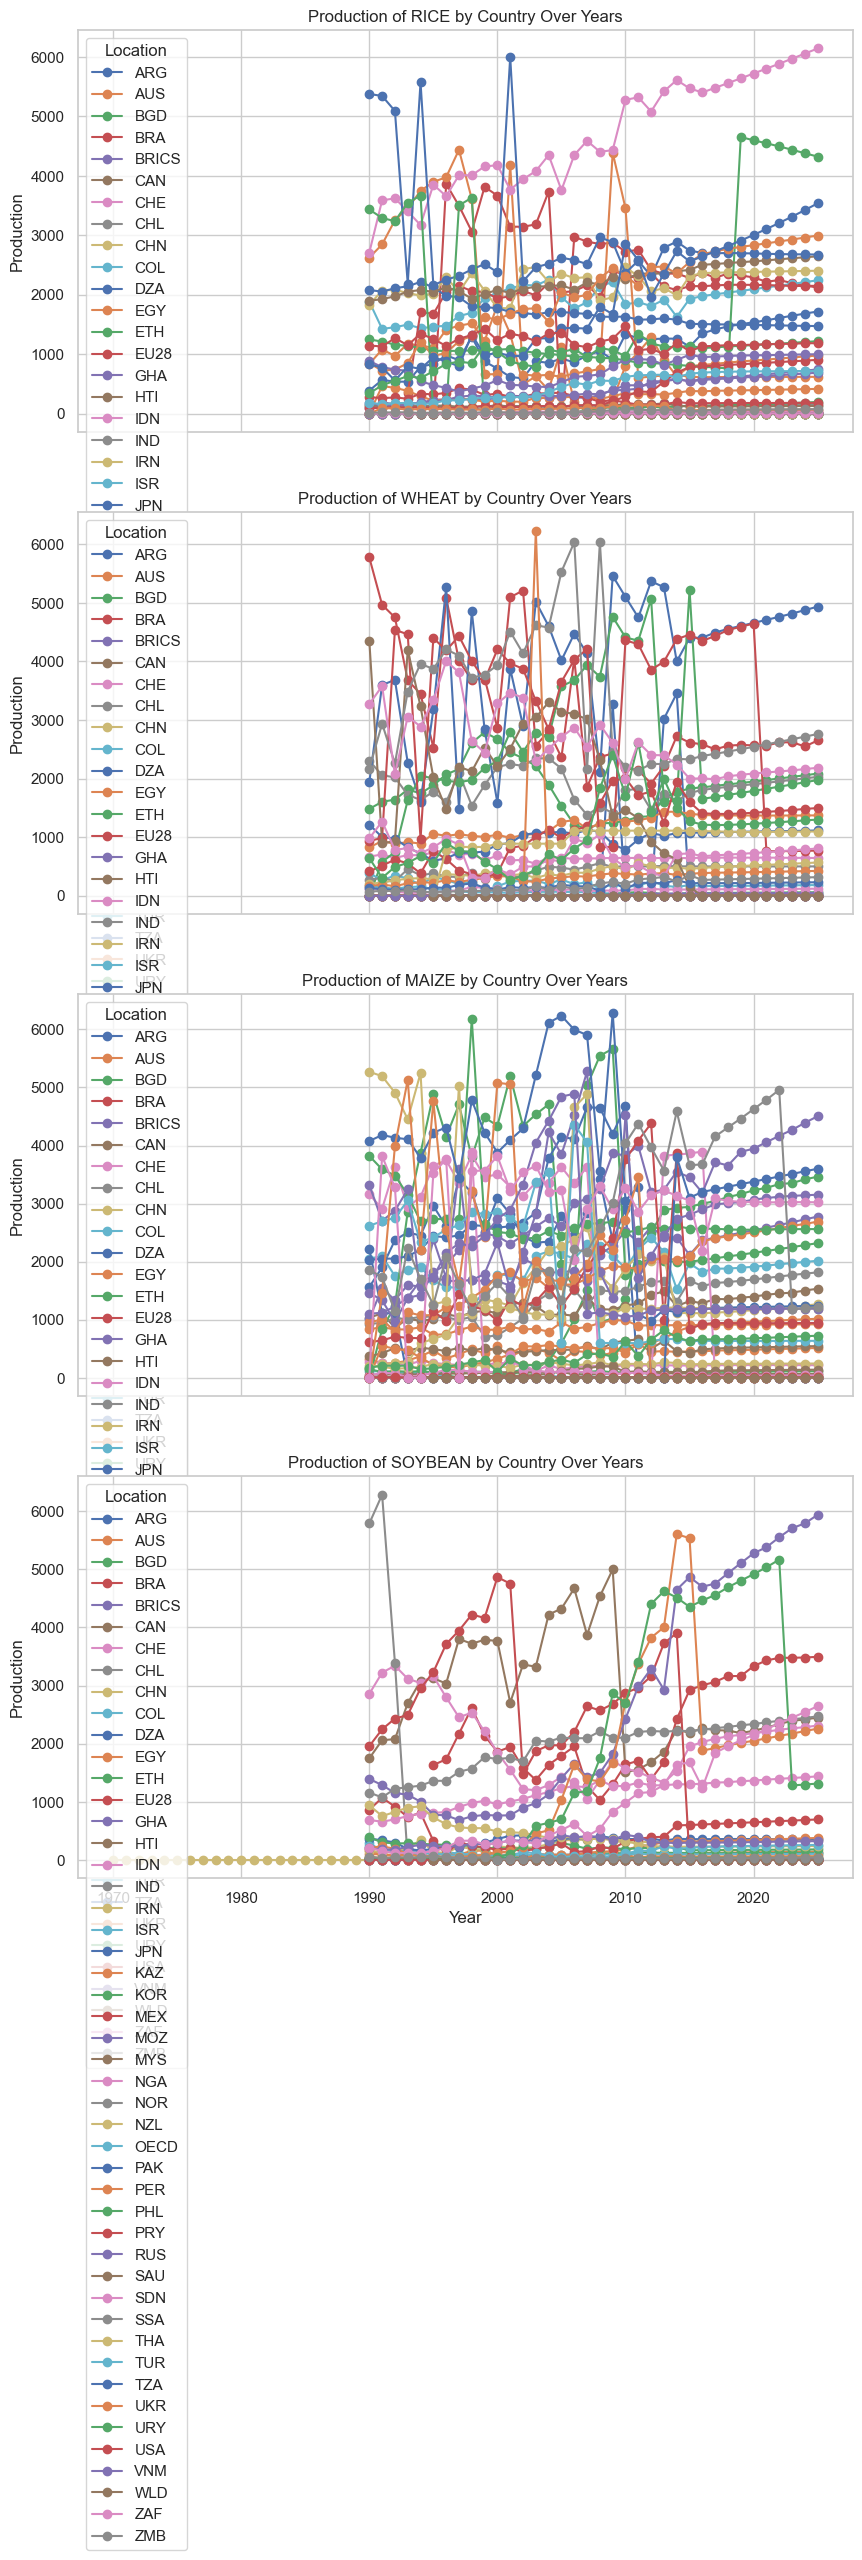

In [36]:
# Crop production by Subject

# Determine the unique subjects and their count
unique_subjects = crop_production_df['Subject'].unique()
num_subjects = len(unique_subjects)

# Create subplots
fig, axes = plt.subplots(num_subjects, 1, figsize=(10, 6*num_subjects), sharex=True)

# Iterate through each subject
for i, subject in enumerate(unique_subjects):
    # Filter data for the current subject
    subject_data = crop_production_df[crop_production_df['Subject'] == subject]
    
    # Group the filtered data by year and location, then sum the production values for each location
    subject_production = subject_data.groupby(['Year', 'Location'])['Value'].sum().unstack()
    
    # Plot the production data for the current subject
    subject_production.plot(ax=axes[i], marker='o', linestyle='-')
    
    # Add labels and title
    axes[i].set_title(f"Production of {subject} by Country Over Years")
    axes[i].set_ylabel('Production')
    axes[i].legend(title='Location')

# Add common x-axis label
axes[-1].set_xlabel('Year')

# Adjust layout
# plt.tight_layout()

# Show or save the plot
plt.show()

# Save the plot as an image file 
# plt.savefig("subject_production_by_country_over_years.png") 

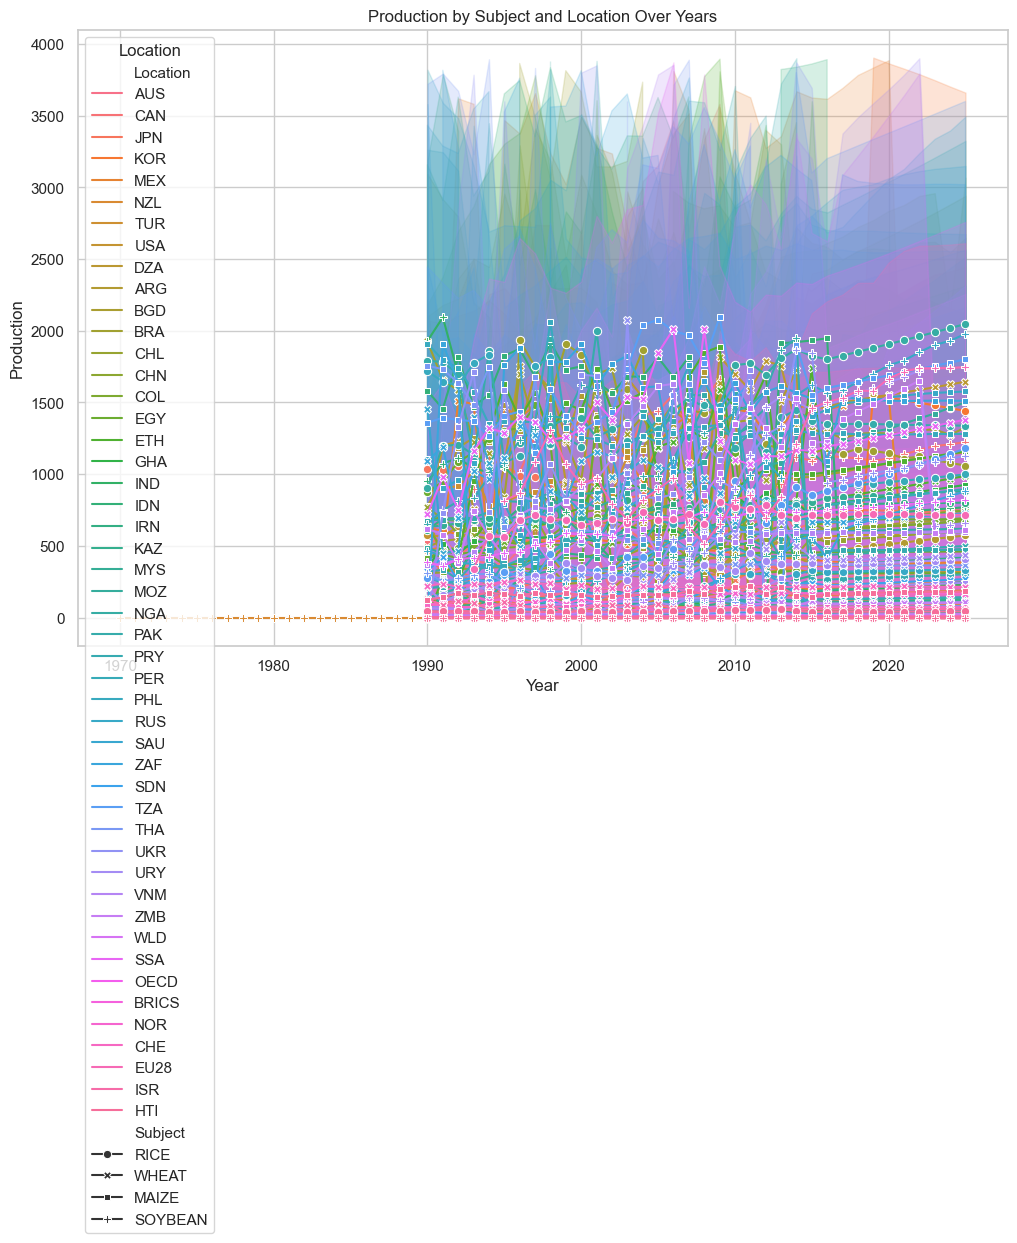

In [37]:
# Crop production by Subject and location using seaborn 

# Set Seaborn style
sns.set_style("whitegrid")

# Create the plot using Seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=crop_production_df, x='Year', y='Value', hue='Location', style='Subject', markers=True, dashes=False)

# Add title and labels
plt.title('Production by Subject and Location Over Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend(title='Location')

# Show or save the plot
plt.show()

# Save the plot as an image file 
# plt.savefig("subject_production_by_country_over_years_seaborn.png") 

In [38]:
# Load pork prices df
# Drop the 'Day' column
pork_prices_df.drop(columns=['Day'], inplace=True)

# Define the mapping for renaming the columns
new_column_names = {
    'Month': 'Month',
    'Year': 'Year',
    'Byproduct': 'Byproduct',
    'Gross_farm_value': 'Gross_Farm_Value',
    'Net_farm_value': 'Net_Farm_Value',
    'Wholesale_value': 'Wholesale_Value',
    'Retail_value': 'Retail_Value',
    'Total': 'Total',
    'Farm_wholesale': 'Farm_Wholesale',
    'Wholesale_retail': 'Wholesale_Retail'
}

# Rename the columns
pork_prices_df.rename(columns=new_column_names, inplace=True)

# Drop rows with NaN values
pork_prices_df.dropna(inplace=True)

# Display the modified DataFrame
pork_prices_df.head()

Month  Year  Byproduct  Gross_Farm_Value  Net_Farm_Value  Wholesale_Value  \
0      1  1970        4.3              52.3            48.0             71.2   
1      2  1970        4.7              53.9            49.2             70.4   
2      3  1970        4.8              49.6            44.8             68.0   
3      4  1970        4.3              45.9            41.6             65.2   
4      5  1970        3.7              44.9            41.2             65.2   

   Retail_Value  Total  Farm_Wholesale  Wholesale_Retail  
0          81.4   33.4            23.2              10.2  
1          81.1   31.9            21.2              10.7  
2          80.7   35.9            23.2              12.7  
3          79.3   37.7            23.6              14.1  
4          79.4   38.2            24.0              14.2

In [39]:
# Calculate mean, median, and standard deviation of 'Byproduct'
pork_mean_byproduct = pork_prices_df['Byproduct'].mean()
pork_median_byproduct = pork_prices_df['Byproduct'].median()
pork_std_byproduct = pork_prices_df['Byproduct'].std()

# Print the statistics
print("Statistics for Byproduct (Pork):")
print("Mean:", pork_mean_byproduct)
print("Median:", pork_median_byproduct)
print("Standard Deviation:", pork_std_byproduct)

Statistics for Byproduct (Pork):
Mean: 5.935185185185184
Median: 5.5
Standard Deviation: 2.057510754920059


In [40]:
# Load beef prices df

# Drop the 'Day' column
beef_prices_df.drop(columns=['day'], inplace=True)

# Define the mapping for renaming the columns
new_column_names = {
    'DATE': 'Month',
    'Day': 'Day',  # Corrected column name
    'Unnamed: 2': 'Year',
    'Byproduct': 'Byproduct',
    'Gross_farm_value': 'Gross_Farm_Value',
    'Net_farm_value': 'Net_Farm_Value',
    'Wholesale_value': 'Wholesale_Value',
    'Retail_value': 'Retail_Value',
    'Total': 'Total',
    'Farm_wholesale': 'Farm_Wholesale',
    'Wholesale_retail': 'Wholesale_Retail',
    'All_fresh_beef_retail_value': 'Beef_Retail_Value'
}

# Rename the columns
beef_prices_df.rename(columns=new_column_names, inplace=True)

# Drop rows with NaN values
beef_prices_df.dropna(inplace=True)

# Display the modified DataFrame
beef_prices_df.head()

Month  Year  Byproduct  Gross_Farm_Value  Net_Farm_Value  \
210      7  1987       19.1             159.0           139.9   
211      8  1987       19.4             156.5           137.1   
212      9  1987       19.6             158.0           138.4   
213     10  1987       20.0             157.9           137.9   
214     11  1987       20.0             156.9           136.9   

     Wholesale_Value  Retail_Value  Total  Farm_Wholesale  Wholesale_Retail  \
210            163.8         244.0  104.1            23.9              80.2   
211            157.0         241.2  104.1            19.9              84.2   
212            159.5         241.3  102.9            21.1              81.8   
213            159.2         241.5  103.6            21.3              82.3   
214            156.8         242.4  105.5            19.9              85.6   

     Beef_Retail_Value  
210              213.9  
211              213.1  
212              214.5  
213              217.7  
214              218.6

In [41]:
beef_mean_byproduct = beef_prices_df['Byproduct'].mean()
beef_median_byproduct = beef_prices_df['Byproduct'].median()
beef_std_byproduct = beef_prices_df['Byproduct'].std()

# Print the statistics
print("Statistics for Byproduct (Beef):")
print("Mean:", beef_mean_byproduct)
print("Median:", beef_median_byproduct)
print("Standard Deviation:", beef_std_byproduct)

Statistics for Byproduct (Beef):
Mean: 23.631050228310496
Median: 20.9
Standard Deviation: 6.7940069358671495


In [42]:
import plotly.graph_objects as go

# Data
categories = ['Pork', 'Beef']
means = [5.935185185185184, 23.631050228310496]
medians = [5.5, 20.9]
std_devs = [2.057510754920059, 6.7940069358671495]

# Create the figure
fig = go.Figure()

# Add mean bars
fig.add_trace(go.Bar(
    x=categories,
    y=means,
    name='Mean',
    marker_color='skyblue'
))

# Add standard deviation error bars
fig.add_trace(go.Scatter(
    x=categories,
    y=means,
    error_y=dict(
        type='data',
        array=std_devs,
        visible=True
    ),
    mode='markers',
    name='Standard Deviation',
    marker=dict(color='black')
))

# Add median points
fig.add_trace(go.Scatter(
    x=categories,
    y=medians,
    mode='markers',
    name='Median',
    marker=dict(color='red', size=10)
))

# Update layout
fig.update_layout(
    title='Statistics for Byproduct (Pork and Beef)',
    xaxis_title='Byproduct',
    yaxis_title='Value',
    barmode='group'
)

# Save the plot as an image file
# fig.write_image("statistics_plotly.png")

# Show the plot
fig.show()


In [43]:
# Merge the beef df and pork df on the 'Year' column
# beef_pork_merged_df = pd.merge(beef_prices_df, pork_prices_df, on='Year', how='inner')
# beef_pork_merged_df.head()